Epoch 001/3000 | Train Loss: 1.609438 | Val Loss: 1.538779 | Train Acc: 0.2009 | Val Acc: 0.5415
Epoch 002/3000 | Train Loss: 1.538604 | Val Loss: 1.476839 | Train Acc: 0.5554 | Val Acc: 0.5431
Epoch 003/3000 | Train Loss: 1.476487 | Val Loss: 1.422766 | Train Acc: 0.5595 | Val Acc: 0.5447
Epoch 004/3000 | Train Loss: 1.422215 | Val Loss: 1.375561 | Train Acc: 0.5630 | Val Acc: 0.5495
Epoch 005/3000 | Train Loss: 1.374779 | Val Loss: 1.334194 | Train Acc: 0.5667 | Val Acc: 0.5495
Epoch 006/3000 | Train Loss: 1.333154 | Val Loss: 1.297710 | Train Acc: 0.5702 | Val Acc: 0.5607
Epoch 007/3000 | Train Loss: 1.296387 | Val Loss: 1.265279 | Train Acc: 0.5739 | Val Acc: 0.5607
Epoch 008/3000 | Train Loss: 1.263661 | Val Loss: 1.236214 | Train Acc: 0.5756 | Val Acc: 0.5655
Epoch 009/3000 | Train Loss: 1.234295 | Val Loss: 1.209957 | Train Acc: 0.5784 | Val Acc: 0.5671
Epoch 010/3000 | Train Loss: 1.207741 | Val Loss: 1.186062 | Train Acc: 0.5821 | Val Acc: 0.5703
Epoch 011/3000 | Train Loss: 1

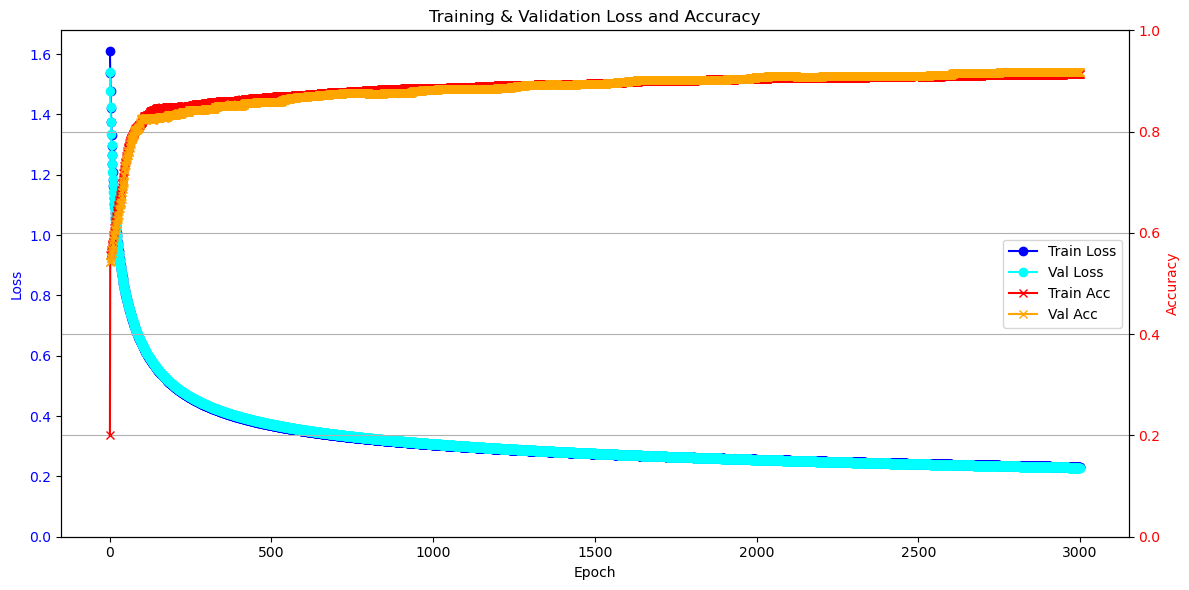

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from Training_loop import trainer
from Prepare_data import X_train, X_test,y_train,y_test

epochs = np.arange(1, len(trainer.train_losses) + 1)

fig, ax1 = plt.subplots(figsize=(12, 6))

# ===== LOSS (LEFT Y-AXIS) =====
ax1.plot(epochs, trainer.train_losses, 'o-', color='blue', label='Train Loss')
ax1.plot(epochs, trainer.val_losses, 'o-', color='cyan', label='Val Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_ylim(bottom=0)

# ===== ACCURACY (RIGHT Y-AXIS) =====
ax2 = ax1.twinx()
ax2.plot(epochs, trainer.train_accs, 'x-', color='red', label='Train Acc')
ax2.plot(epochs, trainer.val_accs, 'x-', color='orange', label='Val Acc')
ax2.set_ylabel('Accuracy', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.set_ylim(0, 1.0)

# ===== TITLE =====
plt.title('Training & Validation Loss and Accuracy')

# ===== LEGEND (COMBINE BOTH AXES) =====
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='center right')

plt.grid(True)
plt.tight_layout()
plt.show()


In [2]:
X_train.shape

(2922, 20)

In [6]:
import pickle
with open("softmax_logistic_model.pkl", "rb") as f:
    model = pickle.load(f)
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [7]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score
train_accuracy = accuracy_score(y_train, train_predict)
test_accuracy = accuracy_score(y_test, test_predict)

# --- Per-class metrics ---
# Recall per class
perclass_recall = recall_score(y_test, test_predict, average=None)
perclass_recall = [round(r, 4) for r in perclass_recall]

# Precision per class
perclass_precision = precision_score(y_test, test_predict, average=None, zero_division=0)
perclass_precision = [round(p, 4) for p in perclass_precision]

# F1 Score per class
perclass_f1 = f1_score(y_test, test_predict, average=None, zero_division=0)
perclass_f1 = [round(f, 4) for f in perclass_f1]

# Confusion Matrix
train_cm = confusion_matrix(y_train, train_predict)
test_cm = confusion_matrix(y_test, test_predict)

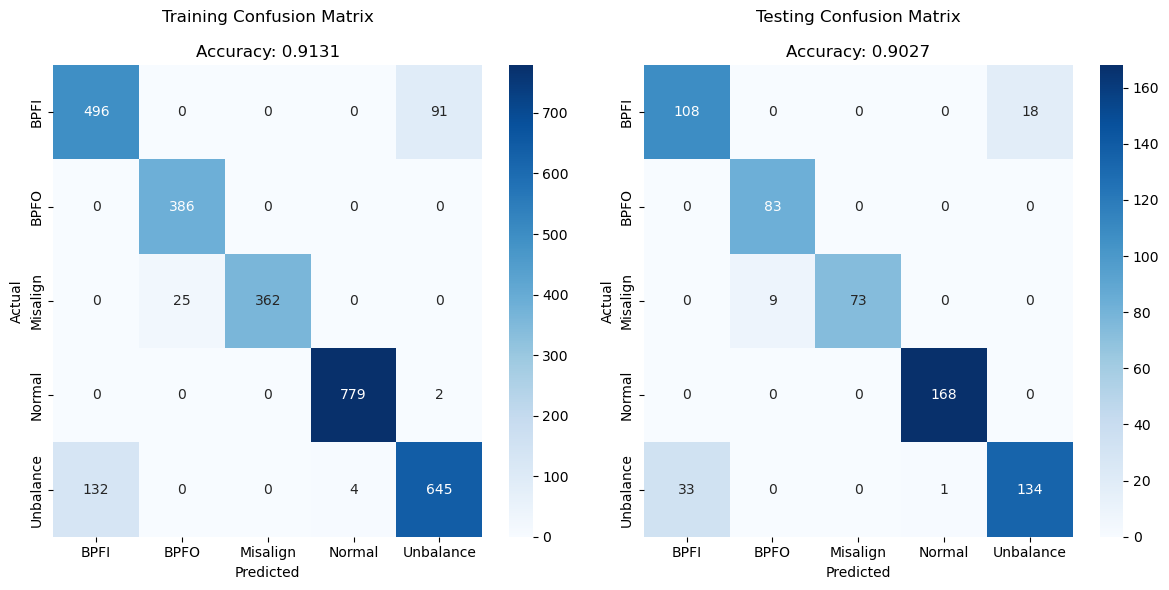

In [8]:
import seaborn as sns
Fault_types = [ 'BPFI',
                'BPFO',  
                'Misalign',
                'Normal',
                'Unbalance'
                ]      
#Biểu đồ confusion matrix
plt.figure(figsize=(12, 6))# Kích thước biểu đồ
plt.subplot(1, 2, 1)# Vẽ biểu đồ đầu tiên trong 1 hàng 2 cột
sns.heatmap(train_cm, annot=True, fmt='d', cmap='Blues', 
xticklabels=Fault_types, yticklabels=Fault_types)# Vẽ heatmap với các nhãn trục x và y
plt.title(f'Training Confusion Matrix\n\nAccuracy: {train_accuracy:.4f}' )# Tiêu đề biểu đồ
plt.xlabel('Predicted')# Nhãn trục x
plt.ylabel('Actual')# Nhãn trục y
plt.subplot(1, 2, 2)# Vẽ biểu đồ thứ hai trong 1 hàng 2 cột
sns.heatmap(test_cm, annot=True, fmt='d', cmap='Blues',
xticklabels=Fault_types, yticklabels=Fault_types)# Vẽ heatmap với các nhãn trục x và y
plt.title(f'Testing Confusion Matrix\n\nAccuracy: {test_accuracy:.4f}')# Tiêu đề biểu đồ
plt.xlabel('Predicted')# Nhãn trục x
plt.ylabel('Actual')# Nhãn trục y
plt.tight_layout()# Tự động điều chỉnh khoảng cách giữa các phần tử trong biểu đồ
plt.show()# Hiển thị biểu đồ
